In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
data = [] 
label = []
for j in range (1,6):
    for i in range (1,502):
        Img = cv2.imread('./images/'+str(j)+'/'+str(i)+'.jpg')
        Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
        Img = cv2.resize(src=Img, dsize=(100,100))
        Img = np.array(Img)
        data.append(Img)
        label.append(j-1)
data1 = np.array(data)
label = np.array(label)
data1 = data1.reshape((2505,100,100,1))
X_train = data1/255

In [3]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY =lb.fit_transform(label)
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_train, trainY, test_size=0.01, random_state=50)
x_train.shape, x_test.shape, np.array(y_train).shape, np.array(y_test).shape

((2479, 100, 100, 1), (26, 100, 100, 1), (2479, 5), (26, 5))

In [5]:
Model = Sequential()
shape = (100,100, 1)
Model.add(Conv2D(32,(3,3),padding="same",input_shape=shape))
Model.add(Activation("relu"))
Model.add(Conv2D(32,(3,3), padding="same"))
Model.add(Activation("relu"))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Conv2D(64,(3,3), padding="same"))
Model.add(Activation("relu"))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Flatten())
Model.add(Dense(512))
Model.add(Activation("relu"))
Model.add(Dense(5))
Model.add(Activation("softmax"))
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                        

In [6]:
Model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
print("start training")
es = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
history = Model.fit(X_train,trainY,batch_size=5,epochs=10,validation_data=(x_test, y_test), callbacks=[es])

start training
Epoch 1/10
501/501 [==============================] - 106s 211ms/step - loss: 0.1164 - accuracy: 0.9589 - val_loss: 1.3525e-04 - val_accuracy: 1.0000
Epoch 2/10
501/501 [==============================] - 108s 215ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 3.3332e-06 - val_accuracy: 1.0000
Epoch 3/10
501/501 [==============================] - 111s 222ms/step - loss: 0.0114 - accuracy: 0.9972 - val_loss: 2.2925e-07 - val_accuracy: 1.0000
Epoch 4/10
501/501 [==============================] - 109s 217ms/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 4.4474e-06 - val_accuracy: 1.0000
Epoch 5/10
501/501 [==============================] - 94s 188ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 4.5850e-09 - val_accuracy: 1.0000
Epoch 6/10
501/501 [==============================] - 95s 189ms/step - loss: 0.0510 - accuracy: 0.9908 - val_loss: 9.9035e-07 - val_accuracy: 1.0000
Epoch 7/10
501/501 [==============================] - 101s 201ms/step - loss: 0.0050 - 

In [8]:
history_dict = history.history

In [9]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

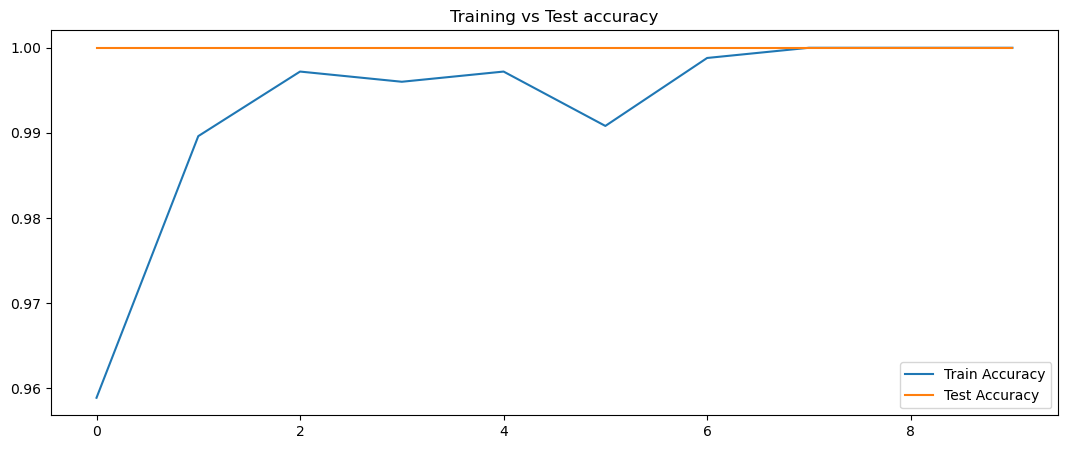

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.title("Training vs Test accuracy")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend(loc='best')
plt.show()

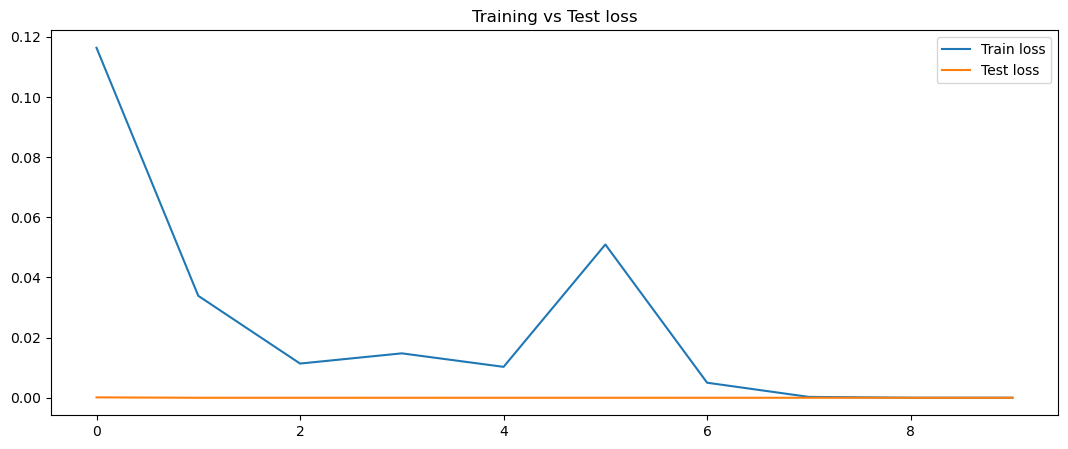

In [11]:
plt.figure(figsize=(13,5))
plt.title("Training vs Test loss")
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend(loc='best')
plt.show()

In [12]:
Model.save("khuonmat.h5")